In [43]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import os

## Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense

import cv2
import pandas as pd
import random
import ntpath

## Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [24]:
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', -1)
data.head()

ipykernel_launcher:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,center,left,right,steering,throttle,reverse,speed
0,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_029.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_029.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_029.jpg,0.0,0.026158,0.0,9.279671
1,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_098.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_098.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_098.jpg,0.0,0.000000,0.0,9.207142
2,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_168.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_168.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_168.jpg,0.0,0.000000,0.0,9.151583
3,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_235.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_235.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_235.jpg,0.0,0.000000,0.0,9.096358
4,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/center_2021_03_29_10_30_42_309.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/left_2021_03_29_10_30_42_309.jpg,/Users/adam/Desktop/galvanize/capstones/autonomous_vehicle/training_data/IMG/right_2021_03_29_10_30_42_309.jpg,0.0,0.165645,0.0,9.086135


In [25]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2021_03_29_10_30_42_029.jpg,left_2021_03_29_10_30_42_029.jpg,right_2021_03_29_10_30_42_029.jpg,0.0,0.026158,0.0,9.279671
1,center_2021_03_29_10_30_42_098.jpg,left_2021_03_29_10_30_42_098.jpg,right_2021_03_29_10_30_42_098.jpg,0.0,0.000000,0.0,9.207142
2,center_2021_03_29_10_30_42_168.jpg,left_2021_03_29_10_30_42_168.jpg,right_2021_03_29_10_30_42_168.jpg,0.0,0.000000,0.0,9.151583
3,center_2021_03_29_10_30_42_235.jpg,left_2021_03_29_10_30_42_235.jpg,right_2021_03_29_10_30_42_235.jpg,0.0,0.000000,0.0,9.096358
4,center_2021_03_29_10_30_42_309.jpg,left_2021_03_29_10_30_42_309.jpg,right_2021_03_29_10_30_42_309.jpg,0.0,0.165645,0.0,9.086135


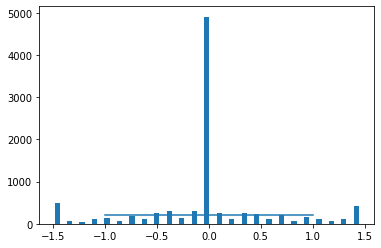

In [26]:

num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = bins[:-1] + bins[1:] * 0.5  # center the bins to 0

plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [35]:
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

image_paths, steerings = load_img_steering('IMG', data)

Training Samples: 7396
Valid Samples: 1850


Text(0.5, 1.0, 'Validation set')

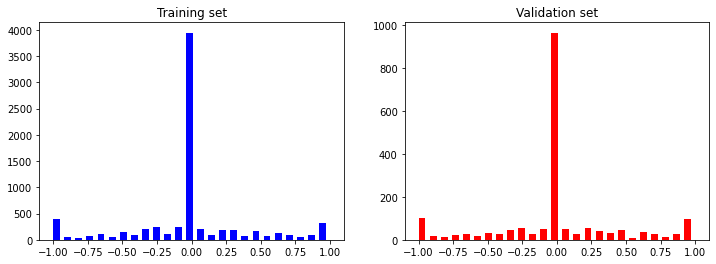

In [36]:

X_train, X_valid, Y_train, Y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=0)

print("Training Samples: {}\nValid Samples: {}".format(len(X_train), len(X_valid)))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(Y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(Y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [37]:
def img_preprocess(img):
  img = npimg.imread(img)
  
  ## Crop image to remove unnecessary features
  img = img[60:135, :, :]
  
  ## Change to YUV image
  img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
  
  ## Gaussian blur
  img = cv2.GaussianBlur(img, (3, 3), 0)
  
  ## Decrease size for easier processing
  img = cv2.resize(img, (100, 100))
  
  ## Normalize values
  img = img / 255
  return img

Text(0.5, 1.0, 'Preprocessed Image')

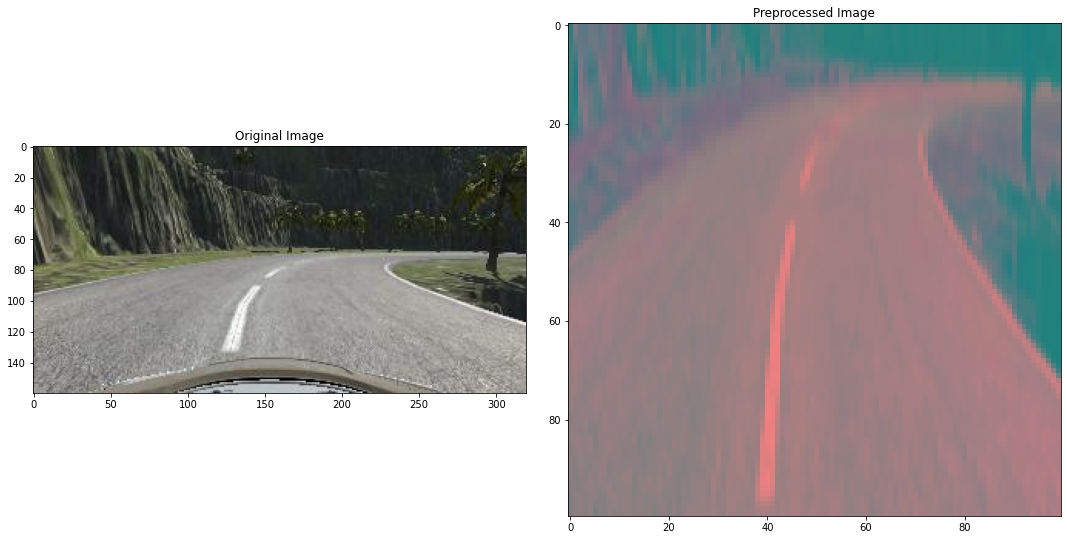

In [38]:
image = image_paths[100]
original_image = npimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[1].imshow(preprocessed_image)
axes[1].set_title('Preprocessed Image')

In [39]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

In [40]:
from keras.applications import ResNet50
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in resnet.layers[:-4]:
    layer.trainable = False
 
for layer in resnet.layers:
    print(layer, layer.trainable)

94773248/94765736 [==============================] - 101s 1us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f8b0a6e6a90> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8ae9f14ed0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8a68eded10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8a6803f650> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f8a68048e90> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f8a980659d0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f8a98069fd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f8a98071050> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f8a98065e50> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f8a80082e90> False
<tensorflow.python.keras.layers.convolutional.C

In [41]:
def nvidia_model():
  model = Sequential()
  model.add(resnet)
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(Dense(100, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='elu'))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  optimizer = Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
  return model

model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 2048)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3276900   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0

Epoch 1/25
58/58 [==============================] - 84s 1s/step - loss: 9.7002 - accuracy: 0.4146 - val_loss: 1.3938 - val_accuracy: 0.5205
Epoch 2/25
58/58 [==============================] - 79s 1s/step - loss: 2.4190 - accuracy: 0.4173 - val_loss: 0.5457 - val_accuracy: 0.5205
Epoch 3/25
58/58 [==============================] - 85s 1s/step - loss: 1.5888 - accuracy: 0.4000 - val_loss: 0.3821 - val_accuracy: 0.5205
Epoch 4/25
58/58 [==============================] - 88s 2s/step - loss: 1.3150 - accuracy: 0.4018 - val_loss: 0.2972 - val_accuracy: 0.5205
Epoch 5/25
58/58 [==============================] - 85s 1s/step - loss: 1.1206 - accuracy: 0.3949 - val_loss: 0.2951 - val_accuracy: 0.5205
Epoch 6/25
58/58 [==============================] - 83s 1s/step - loss: 0.9847 - accuracy: 0.4036 - val_loss: 0.2585 - val_accuracy: 0.5205
Epoch 7/25
58/58 [==============================] - 76s 1s/step - loss: 0.8760 - accuracy: 0.4043 - val_loss: 0.2485 - val_accuracy: 0.5205
Epoch 8/25
58/58 [==

Text(0.5, 0, 'Epoch')

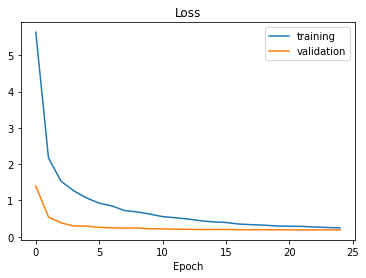

In [42]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5',
                                 monitor='val_loss',
                                 verbose=0,
                                 save_best_only=args.save_best_only,
                                 mode='auto')
                                 
history = model.fit(X_train, Y_train, epochs=25, validation_data=(X_valid, Y_valid), batch_size=128, verbose=1, shuffle=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')